**Workshop**

Create Backtesting Python


## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import mplfinance as mpf
import talib as ta

## Import Dataset

In [2]:
# define asset and date
ticker_name = 'BTC-USD'
start='2021-01-01' 
end='2021-12-31'

In [ ]:
raw_df = yf.download(tickers=ticker_name, start=start, end=end)

## Create Signal

In [3]:
# create macd
raw_df['macd'], raw_df['macdsignal'], raw_df['macdhist'] = ta.MACD(raw_df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

raw_df['macd_shift'] = raw_df['macd'].shift(1)

raw_df.dropna(inplace=True)

raw_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,macd,macdsignal,macdhist,macd_shift
Date,,,,,,,,,,
2021-02-04,37475.105469,38592.175781,36317.500000,36926.066406,36926.066406,68838074392,-15.039748,-637.257416,622.217668,-226.422720
2021-02-05,36931.546875,38225.906250,36658.761719,38144.308594,38144.308594,58598066402,247.926798,-460.220573,708.147371,-15.039748
2021-02-06,38138.386719,40846.546875,38138.386719,39266.011719,39266.011719,71326033653,540.609933,-260.054472,800.664405,247.926798
2021-02-07,39250.191406,39621.835938,37446.152344,38903.441406,38903.441406,65500641143,734.836297,-61.076318,795.912615,540.609933
2021-02-08,38886.828125,46203.929688,38076.324219,46196.464844,46196.464844,101467222687,1460.413394,243.221624,1217.191769,734.836297
...,...,...,...,...,...,...,...,...,...,...
2021-12-26,50428.691406,51196.378906,49623.105469,50809.515625,50809.515625,20964372926,-1036.559746,-1828.605036,792.045291,-1258.392748
2021-12-27,50802.609375,51956.328125,50499.468750,50640.417969,50640.417969,24324345758,-864.435586,-1635.771146,771.335561,-1036.559746
2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469,47588.855469,33430376883,-963.158844,-1501.248686,538.089842,-864.435586


In [4]:
# action 'buy' and 'sell'
raw_df.loc[(raw_df['macd'] > 0) & (raw_df['macd_shift'] < 0), 'action'] = 'buy'
raw_df.loc[(raw_df['macd'] < 0) & (raw_df['macd_shift'] > 0), 'action'] = 'sell'

In [5]:
raw_df[raw_df['action'] == 'buy']

,Open,High,Low,Close,Adj Close,Volume,macd,macdsignal,macdhist,macd_shift,action
Date,,,,,,,,,,,
2021-02-05,36931.546875,38225.906250,36658.761719,38144.308594,38144.308594,58598066402,247.926798,-460.220573,708.147371,-15.039748,buy
2021-05-08,57352.765625,59464.613281,56975.210938,58803.777344,58803.777344,65382980634,179.403644,-280.392041,459.795684,-43.695483,buy
2021-07-26,35384.031250,40499.675781,35287.312500,37337.535156,37337.535156,51022126212,45.903724,-624.571199,670.474923,-323.460446,buy
2021-09-15,47098.000000,48450.468750,46773.328125,48176.347656,48176.347656,30484496466,91.489593,481.960183,-390.470591,-9.948934,buy
2021-10-04,48208.906250,49456.777344,47045.003906,49112.902344,49112.902344,33383173002,221.574229,-512.616310,734.190540,-98.200631,buy


In [6]:
raw_df[raw_df['action'] == 'sell']

,Open,High,Low,Close,Adj Close,Volume,macd,macdsignal,macdhist,macd_shift,action
Date,,,,,,,,,,,
2021-04-22,53857.105469,55410.230469,50583.812500,51762.273438,51762.273438,74798630778,-449.301968,682.552870,-1131.854838,62.254340,sell
2021-05-12,56714.531250,57939.363281,49150.535156,49150.535156,49150.535156,75215403907,-405.780257,-104.422727,-301.357530,205.433969,sell
2021-09-13,46057.214844,46598.679688,43591.320312,44963.074219,44963.074219,40969943253,-28.920476,726.959522,-755.879998,164.099065,sell
2021-09-20,47261.406250,47328.199219,42598.914062,42843.800781,42843.800781,43909845642,-192.001035,200.140618,-392.141653,182.104932,sell
2021-11-20,58115.082031,59859.878906,57469.726562,59697.195312,59697.195312,30624264863,-131.152064,849.130993,-980.283057,10.485538,sell


In [7]:
raw_df['2021-07-20': '2021-07-30']

,Open,High,Low,Close,Adj Close,Volume,macd,macdsignal,macdhist,macd_shift,action
Date,,,,,,,,,,,
2021-07-20,30838.285156,31006.187500,29360.955078,29807.347656,29807.347656,23148267245,-1218.907545,-1023.199675,-195.707870,-1097.466600,NaN
2021-07-21,29796.285156,32752.326172,29526.183594,32110.693359,32110.693359,28203024559,-1116.420223,-1041.843785,-74.576438,-1218.907545,NaN
2021-07-22,32138.873047,32576.400391,31745.298828,32313.105469,32313.105469,19555230518,-1007.254315,-1034.925891,27.671576,-1116.420223,NaN
2021-07-23,32305.958984,33581.550781,32057.892578,33581.550781,33581.550781,22552046192,-809.060268,-989.752766,180.692498,-1007.254315,NaN
2021-07-24,33593.730469,34490.390625,33424.859375,34292.445312,34292.445312,21664706865,-587.850436,-909.372300,321.521864,-809.060268,NaN
2021-07-25,34290.292969,35364.925781,33881.835938,35350.187500,35350.187500,20856685287,-323.460446,-792.189930,468.729484,-587.850436,NaN
2021-07-26,35384.031250,40499.675781,35287.312500,37337.535156,37337.535156,51022126212,45.903724,-624.571199,670.474923,-323.460446,buy
2021-07-27,37276.035156,39406.941406,36441.726562,39406.941406,39406.941406,35097370560,499.849327,-399.687094,899.536421,45.903724,NaN
2021-07-28,39503.187500,40816.070312,38862.437500,39995.906250,39995.906250,38702404695,896.791377,-140.391400,1037.182776,499.849327,NaN


## Strategy Return

In [39]:
def startegy_return(df, action_price = 'Open', side='long'):
    action_df = df.loc[df['action'].notnull()]

    # action 'Open' (next day)
    if action_price == 'Open':
        action_df['action_price'] = df['Open'].shift(-1)
        action_df['return'] = action_df['action_price'].pct_change()
    
    if action_price == 'Close':
        action_df['action_price'] = df['Close']
        action_df['return'] = action_df['action_price'].pct_change()

    # record df
    record_df = action_df[['action', 'action_price', 'return']]
    record_df.reset_index(inplace=True)
    record_df['previous_signal_date'] = record_df['Date'].shift(1)
    record_df['previous_action'] = record_df['action'].shift(1)
    record_df['previous_action_price'] = record_df['action_price'].shift(1)
    record_df.rename(columns={'Date':'signal_date'}, inplace=True)

    # summary return
    if side == 'long':
        summary_df = record_df[record_df.action == 'sell']
        summary_df
    
    if side == 'short':
        summary_df = record_df[record_df.action == 'buy']
        summary_df['return'] = summary_df['return'] * -1

    summary_df.reset_index(inplace=True, drop=True)    
    
    return df, record_df, summary_df

In [40]:
df, record_df, summary_df = startegy_return(raw_df)

/var/folders/6t/_xyw489d5jnd7011n2m_x_ch0000gn/T/ipykernel_31263/2213148132.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_df['action_price'] = df['Open'].shift(-1)
/var/folders/6t/_xyw489d5jnd7011n2m_x_ch0000gn/T/ipykernel_31263/2213148132.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_df['return'] = action_df['action_price'].pct_change()
/var/folders/6t/_xyw489d5jnd7011n2m_x_ch0000gn/T/ipykernel_31263/2213148132.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy 

## Output

In [41]:
df

,Open,High,Low,Close,Adj Close,Volume,macd,macdsignal,macdhist,macd_shift,action
Date,,,,,,,,,,,
2021-02-04,37475.105469,38592.175781,36317.500000,36926.066406,36926.066406,68838074392,-15.039748,-637.257416,622.217668,-226.422720,NaN
2021-02-05,36931.546875,38225.906250,36658.761719,38144.308594,38144.308594,58598066402,247.926798,-460.220573,708.147371,-15.039748,buy
2021-02-06,38138.386719,40846.546875,38138.386719,39266.011719,39266.011719,71326033653,540.609933,-260.054472,800.664405,247.926798,NaN
2021-02-07,39250.191406,39621.835938,37446.152344,38903.441406,38903.441406,65500641143,734.836297,-61.076318,795.912615,540.609933,NaN
2021-02-08,38886.828125,46203.929688,38076.324219,46196.464844,46196.464844,101467222687,1460.413394,243.221624,1217.191769,734.836297,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-26,50428.691406,51196.378906,49623.105469,50809.515625,50809.515625,20964372926,-1036.559746,-1828.605036,792.045291,-1258.392748,NaN
2021-12-27,50802.609375,51956.328125,50499.468750,50640.417969,50640.417969,24324345758,-864.435586,-1635.771146,771.335561,-1036.559746,NaN
2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469,47588.855469,33430376883,-963.158844,-1501.248686,538.089842,-864.435586,NaN


In [42]:
record_df

,signal_date,action,action_price,return,previous_signal_date,previous_action,previous_action_price
0,2021-02-05,buy,38138.386719,NaN,NaT,None,NaN
1,2021-04-22,sell,51739.808594,0.356633,2021-02-05,buy,38138.386719
2,2021-05-08,buy,58877.390625,0.137951,2021-04-22,sell,51739.808594
3,2021-05-12,sell,49735.433594,-0.155271,2021-05-08,buy,58877.390625
4,2021-07-26,buy,37276.035156,-0.250514,2021-05-12,sell,49735.433594
5,2021-09-13,sell,44960.050781,0.206138,2021-07-26,buy,37276.035156
6,2021-09-15,buy,48158.906250,0.071149,2021-09-13,sell,44960.050781
7,2021-09-20,sell,43012.234375,-0.106869,2021-09-15,buy,48158.906250
8,2021-10-04,buy,49174.960938,0.143278,2021-09-20,sell,43012.234375
9,2021-11-20,sell,59730.507812,0.214653,2021-10-04,buy,49174.960938


In [43]:
summary_df

,signal_date,action,action_price,return,previous_signal_date,previous_action,previous_action_price
0,2021-04-22,sell,51739.808594,0.356633,2021-02-05,buy,38138.386719
1,2021-05-12,sell,49735.433594,-0.155271,2021-05-08,buy,58877.390625
2,2021-09-13,sell,44960.050781,0.206138,2021-07-26,buy,37276.035156
3,2021-09-20,sell,43012.234375,-0.106869,2021-09-15,buy,48158.906250
4,2021-11-20,sell,59730.507812,0.214653,2021-10-04,buy,49174.960938


<AxesSubplot: title={'center': 'Backtest Return'}>

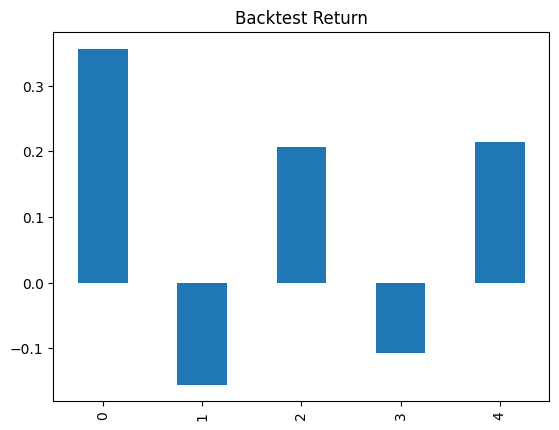

In [44]:
# long side
summary_df['return'].plot(kind='bar', title='Backtest Return')